# Regresión logística #

Es un tipo de análisis para predecir el resultado de una variable categórica frente a otras variables independientes.

Se utiliza para calcular la probabilidad de que un evento ocurra o no en función de otros factores.
Unos ejemplos claros pueden ser: el de la clasificación de correos electrónicos como SPAM o NO SPAM, la aceptación o no de una solicitud de préstamo bancario, o la clasificación de una persona con una enfermedad definida o no en base a sus síntomas.

Este tipo de clasificaciones donde hay solo dos resultados posibles se denominan clasificaciones binarias. Los valores obtenidos oscilan entre 0 y 1. Si el valor obtenido es mayor de 0.5 se considera 1 y en caso contrario 0.

En este tipo de análisis, es muy útil elaborar una "matriz de confusión" donde se dibujan 4 cuadrantes.
En las filas se disponen los valores reales ("SI" real para la fila 1 y "NO" real para la fila 2), mientras que las columnas expresan los valores predictivos ("SI" predicción en columna 1 y "NO" predicción en columna 2).
De este modo se representan los casos positivos verdaderos y falsos, y los casos negativos verdaderos y falsos.


| correos totales = 200 | Predicción (SI es spam) | Predicción (NO es spam) |
|:-|:-|:-|
| Valor real (SI es spam) | 30 (PC) | 15 (FN) |
| Valor real (NO es spam) | 5 (FP) | 150 (NC) |

- PC = positivos correctos
- NC = negativos correctos
- FP = falsos positivos (error tipo 1)
- FN = falsos negativos (error tipo 2)

La predicción se expresa indicando la cantidad de aciertos frente a la cantidad de errores expresados en porcentajes.

**Precisión = (Positivos correctos + Negativos correctos) / Total**

**Precisión = (30 + 150) / 200 = 0.9** (probabilidad de acierto del 90%)

La tasa de error se elabora con la misma fórmula.

**Tasa de error = (Falsos positivos + Falsos negativos) / Total**

**Tasa de error = (5 + 15) / 200 = 0.1** (tasa de error del 10%)





In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [160]:
cd archivos/

[WinError 2] El sistema no puede encontrar el archivo especificado: 'archivos/'
c:\Users\David\PYTHON\CURSO_IBM_SkillsBuild_Machine_Learning\archivos


In [161]:
entrenamiento = pd.read_csv('train_titanic.csv')
#Cargamos el dataset de entrenamiento

In [162]:
entrenamiento.head()
# Mostramos las primeras filas del dataframe

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [163]:
entrenamiento.isnull().sum()
# Comprobamos cuántos valores nulos hay en cada columna del dataset

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

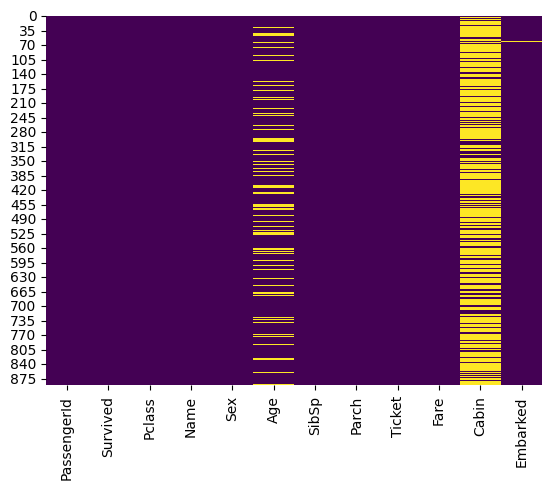

In [164]:
sns.heatmap(entrenamiento.isnull(), cbar=False, cmap='viridis')
# Visualizamos los valores nulos en el dataset

<Axes: xlabel='Survived', ylabel='count'>

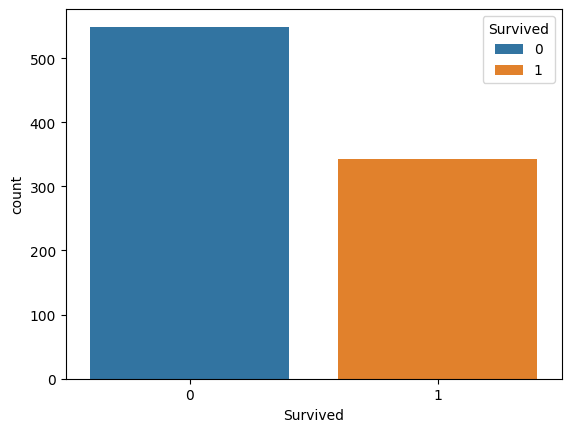

In [165]:
sns.countplot(x='Survived', data=entrenamiento, hue='Survived')
# Visualizamos la cantidad de sobrevivientes y no sobrevivientes

<Axes: xlabel='Survived', ylabel='count'>

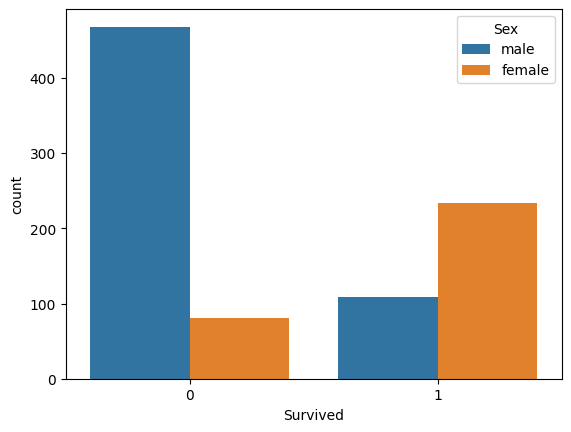

In [166]:
sns.countplot(x='Survived', data=entrenamiento, hue='Sex')
# Visualizamos la cantidad de sobrevivientes y no sobrevivientes según el sexo


<Axes: xlabel='Survived', ylabel='count'>

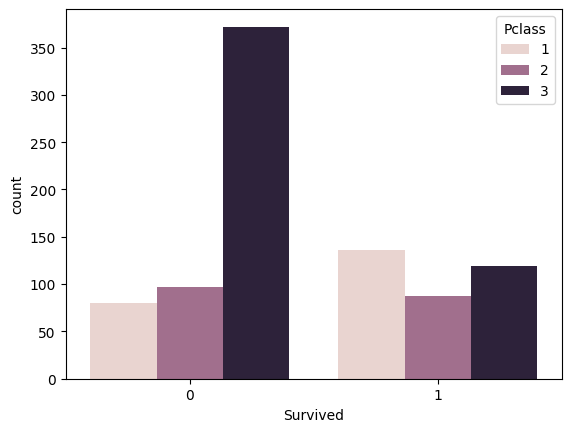

In [167]:
sns.countplot(x='Survived', data=entrenamiento, hue='Pclass')
# Visualizamos la cantidad de sobrevivientes y no sobrevivientes según la clase


<Axes: xlabel='Age', ylabel='Count'>

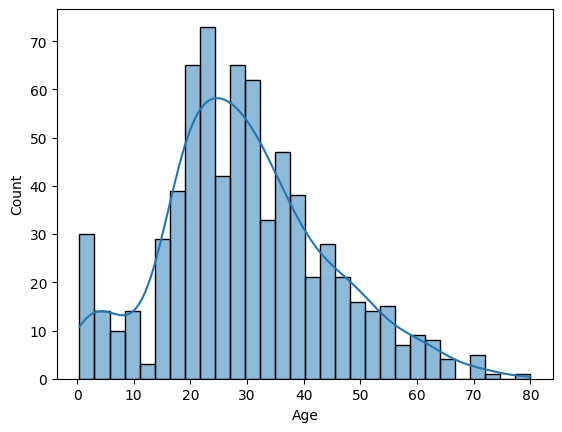

In [168]:
sns.histplot(entrenamiento['Age'].dropna(), bins=30, kde=True)
# Visualizamos la distribución de edades en el dataset


<Axes: xlabel='SibSp', ylabel='Count'>

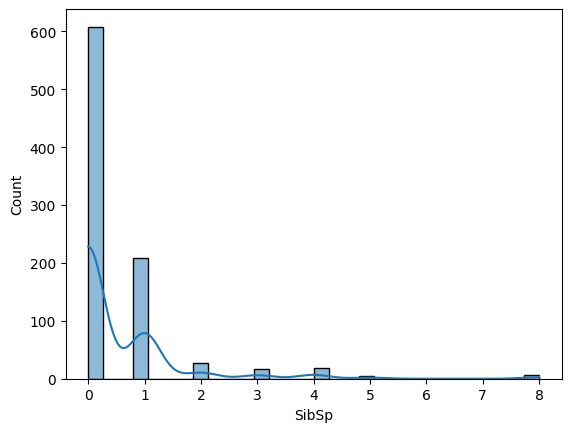

In [169]:
sns.histplot(entrenamiento['SibSp'].dropna(), bins=30, kde=True)
# Visualizamos la distribución de la cantidad de familiares de cada persona en el dataset


## Limpieza de los datos del dataset ##

Debemos tomar acciones frente a los datos faltantes que encontramos en el dataset, en las columnas edad y camarote

Con la edad analizaremos la edad media de cada clase por edad

<Axes: xlabel='Pclass', ylabel='Age'>

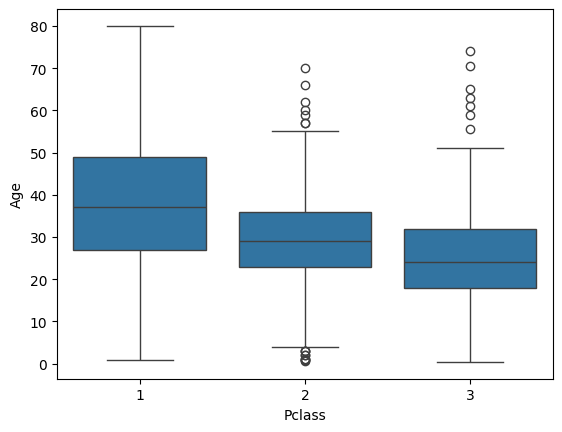

In [170]:
sns.boxplot(x='Pclass', y='Age', data=entrenamiento)
# Visualizamos la relación entre la clase y la edad de los pasajeros


In [171]:
def edad_media(columnas):
    edad = columnas[0]
    clase = columnas[1]
    if pd.isnull(edad):
        if clase == 1:
            return 38.0
        elif clase == 2:
            return 29.0
        elif clase == 3:
            return 24.0
    else:
        return edad
# Definimos una función para calcular la edad media según la clase del pasajero


In [172]:
entrenamiento['Age'] = entrenamiento[['Age', 'Pclass']].apply(edad_media, axis=1)
# Aplicamos la función a la columna 'Age' del dataset

C:\Users\David\AppData\Local\Temp\ipykernel_28808\910450383.py:2: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\David\AppData\Local\Temp\ipykernel_28808\910450383.py:3: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



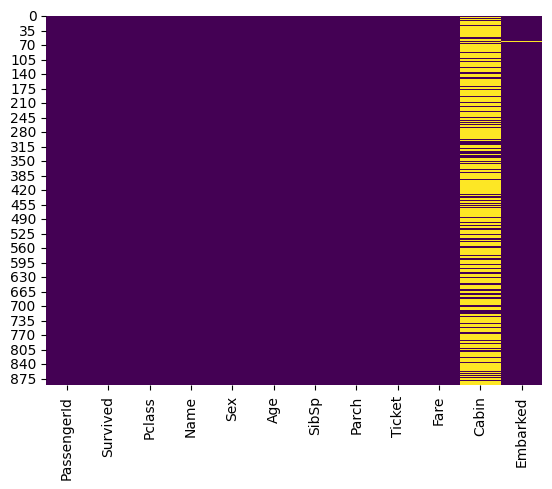

In [173]:
sns.heatmap(entrenamiento.isnull(), cbar=False, cmap='viridis')
# Visualizamos los valores nulos en el dataset
#ya hemos solucionado los valores de la columna edad,
#ahora vamos a eliminar la columna 'Cabin' ya que tiene muchos valores nulos
entrenamiento.drop('Cabin', axis=1, inplace=True)

In [174]:
#Vamos a eliminar las columnas 'Name', 'PasengerId' y 'Ticket' ya que no aportan información relevante para el modelo
entrenamiento.drop(['Name', 'PassengerId', 'Ticket'], axis=1, inplace=True)
#Comprobamos que se han eliminado las columnas
entrenamiento.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [175]:
#Existen 2 valores nulos en la columna 'Embarked', vamos a eliminarlos
entrenamiento.dropna(subset=['Embarked'], inplace=True)
#Comprobamos que se han eliminado los valores nulos
entrenamiento.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [176]:
#Vamos a sustituir los valores de la columna 'Sex' por 0 y 1, donde 0 es hombre y 1 es mujer
entrenamiento['Male'] = entrenamiento['Sex'].map({'male': 1, 'female': 0})
#Comprobamos que se han sustituido los valores
entrenamiento.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Male
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,0
2,1,3,female,26.0,0,0,7.9250,S,0
3,1,1,female,35.0,1,0,53.1000,S,0
4,0,3,male,35.0,0,0,8.0500,S,1


In [ ]:
#Hacemos lo mismo con la columna 'Embarked', donde 0 es C, 1 es Q y 2 es S
entrenamiento['Puerto'] = entrenamiento['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
#Comprobamos que se han sustituido los valores
entrenamiento.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Male,Puerto
0,0,3,male,22.0,1,0,7.2500,S,1,2
1,1,1,female,38.0,1,0,71.2833,C,0,0
2,1,3,female,26.0,0,0,7.9250,S,0,2
3,1,1,female,35.0,1,0,53.1000,S,0,2
4,0,3,male,35.0,0,0,8.0500,S,1,2


In [182]:
#Ahora podemos quitar las columnas 'Sex' y 'Embarked' que hemos sustituido por 'Male' y 'Puerto'
entrenamiento.drop(['Sex', 'Embarked'],axis=1, inplace=True)
#Comprobamos que se han eliminado las columnas
entrenamiento.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Male,Puerto
0,0,3,22.0,1,0,7.2500,1,2
1,1,1,38.0,1,0,71.2833,0,0
2,1,3,26.0,0,0,7.9250,0,2
3,1,1,35.0,1,0,53.1000,0,2
4,0,3,35.0,0,0,8.0500,1,2


In [184]:
X = entrenamiento['Survived']
y = entrenamiento.drop('Survived', axis=1)
#Definimos las variables X e y, donde X es la variable dependiente y y es la variable independiente

In [188]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(y, X, test_size=0.3, random_state=45)
#Dividimos el dataset en entrenamiento y test, donde el 30% es el test y el 70% es el entrenamiento

In [189]:
#importamos el modelo de regresión logística
from sklearn.linear_model import LogisticRegression

In [192]:
modelo = LogisticRegression()
modelo.fit(X_train, y_train)
#Creamos el modelo de regresión logística y lo entrenamos con el dataset de entrenamiento

LogisticRegression()

In [199]:
from sklearn.metrics import confusion_matrix, classification_report
#Hacemos la predicción con el dataset de test
prediccion = modelo.predict(X_test)
prediccion
#Mostramos la predicción del modelo


array([0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0])

In [200]:
np.array(y_test)
#Mostramos el dataset de test

array([0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0])

In [201]:
print(classification_report(y_test, prediccion))
#Mostramos el reporte de clasificación del modelo

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       169
           1       0.78      0.62      0.69        98

    accuracy                           0.80       267
   macro avg       0.79      0.76      0.77       267
weighted avg       0.80      0.80      0.79       267



In [202]:
print(confusion_matrix(y_test, prediccion))
#Mostramos la matriz de confusión del modelo

[[152  17]
 [ 37  61]]


Vemos que de un total de registros de 267 la matriz de confusión arroja:
- 152 Positivos
- 17 Falsos positivos
- 37 Falsos negativos
- 61 Negativos

Una tasa de acierto de (152 + 61) / 267 = 0.79775 o una tasa de acierto del 80%
Una tassa de error de (17 + 37) / 267 = 0.20225 o una tasa de error del 20%

## Ejercicios ##

Supongamos que tienes un conjunto de datos que contiene información sobre pacientes y deseas predecir si un paciente tiene una enfermedad (1) o no (0) en función de algunas características médicas, como la edad y los niveles de colesterol.

Tu tarea es desarrollar una función llamada regresion_logistica que tome estos datos como entrada y ajuste un modelo de regresión logística para la clasificación binaria.

In [203]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Función de regresión logística
def regresion_logistica(datos):
    x = datos['Enfermedad']
    y = datos.drop('Enfermedad', axis = 1)
    #Dividimos el set en datos test y datos entrenamiento
    x_train, x_test, y_train, y_test = train_test_split(y, x, test_size=0.3, random_state=45)
    
    modelo = LogisticRegression()
    modelo.fit(x_train, y_train)
    return modelo
    

Eres parte de un equipo de análisis de una startup que lanza apps móviles. Se te ha asignado la tarea de construir un modelo que pueda predecir si una app será exitosa o no en función de sus métricas iniciales.

La empresa ha recopilado datos de otras apps anteriores, tanto exitosas como fallidas, y quiere automatizar este análisis con Machine Learning.

🎯 Objetivo

Crea un sistema en Python que permita:

Representar los datos de una app.

Preparar un conjunto de datos a partir de múltiples apps.

Entrenar un modelo de regresión logística con scikit-learn.

Predecir si una app será exitosa.

De forma opcional, mostrar la probabilidad de éxito.

🧱 Estructura del proyecto

Debes implementar las siguientes clases:

📦 App

Representa una app móvil con las siguientes características:

app_name: nombre de la app.

monthly_users: número de usuarios mensuales.

avg_session_length: duración media de las sesiones (en minutos).

retention_rate: tasa de retención entre 0 y 1.

social_shares: número de veces que se ha compartido en redes sociales.

success: valor opcional (1 = éxito, 0 = fracaso).

Método:

to_features(self): devuelve una lista de características numéricas.

📊 AppDataset

Representa un conjunto de datos de apps. Debe incluir:

Lista de objetos App.

Métodos:

get_feature_matrix(self): devuelve una matriz de características.

get_target_vector(self): devuelve un vector de etiquetas (success).

🤖 SuccessPredictor

Encargado de entrenar y usar el modelo de regresión logística.

Métodos:

train(dataset): entrena el modelo usando un AppDataset.

predict(app): devuelve 1 o 0 para predecir si la app será exitosa.

predict_proba(app): (opcional) devuelve la probabilidad de éxito como número decimal entre 0 y 1.

💡 Sugerencia: puedes usar StandardScaler para mejorar la precisión del modelo escalando los datos.

In [204]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
class App:
    def __init__(self, app_name, monthly_users, avg_session_length, retention_rate, social_shares, success = None):
        self.app_name = app_name
        self.monthly_users = monthly_users
        self.avg_session_length = avg_session_length
        self.retention_rate = retention_rate
        self.social_shares = social_shares
        self.success = success

    def to_features(self):
        return [
            self.monthly_users,
            self.avg_session_length,
            self.retention_rate, 
            self.social_shares
        ]

class AppDataset:
    def __init__(self, apps):
        self.apps = apps
    
    def get_feature_matrix(self):
        return [app.to_features() for app in self.apps]
    
    def get_target_vector(self):
        return [app.success for app in self.apps if app.success is not None]

class SuccessPredictor:
    def __init__(self):
        self.model = LogisticRegression()
        self.scaler = StandardScaler()

    def train(self, dataset: AppDataset):
        x = dataset.get_feature_matrix()
        y = dataset.get_target_vector()
        x_scaled = self.scaler.fit_transform(x)
        self.model.fit(x_scaled, y)

    def predict(self, app: App, threshold=0.5):
        prob = self.predict_proba(app)
        return 1 if prob >= threshold else 0

    def predict_proba(self, app: App):
        prediccion = np.array(app.to_features()).reshape(1, -1)
        pred_scaled = self.scaler.transform(prediccion)
        return self.model.predict_proba(pred_scaled)[0][1]

Tienes que construir un modelo predictivo que, a partir de las estadísticas de un jugador en una partida, determine si ganó o no. Para ello, deberás:

Crear datos sintéticos que representen partidas ficticias de jugadores.

Entrenar un modelo de regresión logística con esos datos.

Implementar una función que prediga el resultado (ganar o no) para un nuevo jugador.



📦 Paso 1: Definir una clase para representar una partida

Crea una clase PlayerMatchData con los siguientes atributos:

kills: número de enemigos eliminados

deaths: número de veces que el jugador ha muerto

assists: asistencias realizadas

damage_dealt: daño total infligido

damage_received: daño total recibido

healing_done: curación realizada

objective_time: tiempo (en segundos) que el jugador estuvo capturando objetivos

won: 1 si el jugador ganó la partida, 0 si perdió

Incluye un método .to_dict() que devuelva los datos como un diccionario (sin la variable won, opcionalmente).



📦 Paso 2: Generar datos sintéticos con NumPy

Crea una función llamada generate_synthetic_data que genere un conjunto de datos de entrenamiento simulando partidas de videojuegos. Para ello:

Utiliza la librería numpy para generar los valores numéricos.

Cada instancia representará el desempeño de un jugador en una partida.

La función debe devolver una lista de objetos PlayerMatchData (ya definida previamente).

Implementa la siguiente lógica para cada jugador:

Reglas para los datos:

kills: número de enemigos eliminados, generado con una distribución de Poisson con media 5.

kills = np.random.poisson(5)
deaths: número de veces que el jugador ha muerto, distribución de Poisson con media 3.

assists: asistencias realizadas, distribución de Poisson con media 2.

damage_dealt: daño infligido, calculado como kills * 300 + ruido aleatorio normal.

damage_received = deaths * 400 + np.random.normal(0, 100)
damage_received: daño recibido, como deaths * 400 + ruido aleatorio normal.

healing_done: cantidad de curación, valor aleatorio entero entre 0 y 300.

objective_time: tiempo (en segundos) controlando objetivos, valor aleatorio entre 0 y 120.

won: el jugador se considera que ganó la partida si hizo más daño del que recibió y tuvo más kills que muertes.

🧠 Tu función debe seguir esta estructura:

import numpy as np
 
def generate_synthetic_data(n=100):
    data = []
    for _ in range(n):
        # Genera cada variable siguiendo las instrucciones dadas
        # Crea un objeto PlayerMatchData con estos valores
        # Añádelo a la lista de datos
 
    return data


🧪 Paso 3: Crear y entrenar el modelo

Crea una clase VictoryPredictor que entrene un modelo de regresión logística con los datos sintéticos. Esta clase debe tener:

Un método train(data) para entrenar el modelo.

Un método predict(player: PlayerMatchData) que devuelva 1 si predice victoria, 0 si derrota.



📌 Ejemplo de uso

# Crear datos de entrenamiento
training_data = generate_synthetic_data(150)
 
# Entrenar modelo
predictor = VictoryPredictor()
predictor.train(training_data)
 
# Crear jugador de prueba
test_player = PlayerMatchData(8, 2, 3, 2400, 800, 120, 90, None)
 
# Predecir si ganará
prediction = predictor.predict(test_player)
print(f"¿El jugador ganará? {'Sí' if prediction == 1 else 'No'}")


Salida esperada

¿El jugador ganará? Sí


# Ejercicio 4 #

In [205]:
#Importamos las librearías que vamos a utilizar.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

#Clase WeatherRecord:
# - humedad: humedad relativa en %
# - presion: presión atmosférica en hPa
# - lluvia: variable binaria (1 = SI, 0 = NO)

# - to_vector: devuelve cada observación como un vector [humedad, presion], para entrenar el modelo
class WeatherRecord:
    def __init__(self, humedad, presion, lluvia):
        self.humedad = humedad
        self.presion = presion
        self.lluvia = lluvia
    
    def to_vector(self):
        return [self.humedad, self.presion]

#Clase WeatherDataGenerator
# - Genera datos sintéticos simulando un patrón lógico:
#       - Alta humedad = más probabilidad de lluvia
#       - Baja presión = más probabilidad de lluvia

# - Utiliza una función sigmoide para expresar el resultado en 1 (SI lloverá) o 0 (NO lloverá)
class WeatherDataGenerator:
    def __init__(self, samples = 200):
        self.samples = samples
    
    def generate(self):
        humedad = np.random.uniform(30, 100, self.samples)
        #genera valore de humedad entre 30% y 100%
        presion = np.random.uniform(980, 1050, self.samples)
        #genera valores de presión atmosférica entre 980 y 1015 hPa
        
        #Estableciendo la probabilidad de lluvia
        #Cuanta más humedad y menos presión, más probabilidad de lluvia
        probabilidad_de_lluvia = (humedad-50) * 0.03 - (presion - 1010) * 0.02
        probabilidad_de_lluvia = 1 / (1 + np.exp(-probabilidad_de_lluvia))
        
        lluvias = (probabilidad_de_lluvia > 0.5).astype(int)
        
        #devolvemos los valores
        datos = [WeatherRecord(h, p, r) for h, p, r in zip(humedad, presion, lluvia)]
        return datos
        
#Clase WeatherRainClassifier
# - Entrena una regresión logística
# - fit(records): entrena el modelo con los datos
# - predict(humedad, presion): predice si lloverá o no en base a nuevas condiciones
# - evaluate(records): evalúa métricas de rendimiento (precisión, recall, F1 y matriz de confusión)
class WeatherRainClassifier:
    def __init__(self):
        self.model = LogisticRegression()
    
    def fit(self, records):
        X = np.array([r.to_vector() for r in records])
        y = np.array([r.lluvia for r in records])
        self.model.fit(X, y)
    
    def predict(self, humedad, presion):
        return self.model.predict([[humedad, presion]])[0]
    
    def evaluate(self, records):
        X = np.array([r.to_vector() for r in records])
        y = np.array([r.lluvia for r in records])
        y_pred = self.model.predict(X)
        print(confusion_matrix(y, y_pred))
        print(classification_report(y, y_pred))

#Clase WeatherRainPredictionExample:
# - Entrena el modelo con el 70% de los datos.
# - Evalúa el modelo con el 30% restante.
class WeatherRainPredictionExample:
    def run(self):
        generador = WeatherDataGenerator()
        records = generador.generate()
        
        train_records, test_records = train_test_split(records, test_size = 0.3, random_state = 42)
        
        classifier = WeatherRainClassifier()
        classifier.fit(train_records)
        classifier.evaluate(test_records)

# - Realiza una predicción nueva para condiciones específicas (80% humedad, 995 hPa presión).
        humidity_test = 80
        pressure_test = 995
        prediction = classifier.predict(humidity_test, pressure_test)
 
        print("🔍 Predicción para condiciones nuevas:")
        print(f"   Humedad: {humidity_test}%")
        print(f"   Presión: {pressure_test} hPa")
        print(f"   ¿Lloverá?: {'Sí' if prediction == 1 else 'No️'}")

# Visualización de los datos en un scatterplot:
# - Muestra un gráfico. Cada punto representa una observación de la muestra de prueba.
# - Selección por colores ( rojo = SI lovió, azul = NO llovió)

        df = pd.DataFrame({
            'Humedad' : [r.humedad for r in test_records],
            'Presion' : [r.presion for r in test_records],
            'Lluvia' : [r.lluvia for r in test_records]
        })
        
        plt.figure(figsize = (8, 6))
        scatter = plt.scatter(df['Humedad'], df['Presion'], c=df['Lluvia'], cmap='bwr', alpha=0.6)
        plt.xlabel("Humedad relativa (%)")
        plt.ylabel("Presión atmosférica (hPa)")
        plt.title("Predicción de lluvia según condiciones meteorológicas")
        plt.grid(True)
        plt.colorbar(scatter, label="0 = No llueve, 1 = Llueve")
        plt.show()